In [5]:
#Importo las librerías necesarias

import numpy as np
#Semilla para asegurar valores aleatorios
np.random.seed(10)

import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_docs as tfdocs

In [6]:
# Cargo y proceso los datos
data = pd.read_csv("D:\\Programas\\OneDrive - Estudiantes ITCR\\TEC\\Semestre 9\\IA\\Tareas\\Tarea1_IA\\ParteA\\synchronous machine.csv", sep=';')
data
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)

data = mean_norm(data)

data.head()

,Iy,PF,e,dIf,If
0,0.0,0.028571,0.971429,0.472678,0.472678
1,0.0,0.085714,0.914286,0.457650,0.457650
2,0.0,0.142857,0.857143,0.441257,0.441257
3,0.0,0.200000,0.800000,0.411202,0.411202
4,0.0,0.257143,0.742857,0.382514,0.382514


In [7]:
#Divido los datos en entradas y salidas
X=data[["Iy", "PF", "e", "dIf"]]
y=data[["If"]]

# Divido los datos en datos de entrenamiento y datos de testeo
# 60% entrenamiento, 40% para test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#y 2% para validación
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.95, random_state=42) 

In [8]:
# Se definen los parámetros de la red neuronal
def build_model():
  model = keras.Sequential([
    layers.Dense(2, activation='relu', input_shape=[4]), #Número de entradas
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adamax(learning_rate=0.02) #Define el optimizador

  model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=['accuracy', "mae", "mse"])
  return model

In [9]:
#Las siguientes funciones sirven para imprimir la curva de aprendizaje de la red
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()

In [10]:
#Construyo el modelo neuronal y lo cargo en "model"
model = build_model()

#Se imprime un resumen del modelo que se utilizará
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 8)                 24        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Se entrena el modelo
history = model.fit(X_train,y_train,
                    validation_data=(X_test, y_test),
                    epochs = 500,  
                    verbose = 1, 
                    callbacks = [PrintDot()])

Epoch 1/500
11/11 [==============================] - 2s 31ms/step - loss: 0.0609 - accuracy: 0.0030 - mae: 0.2750 - mse: 0.1218 - val_loss: 0.0220 - val_accuracy: 0.0135 - val_mae: 0.1786 - val_mse: 0.0440
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 0.0210 - accuracy: 0.0030 - mae: 0.1681 - mse: 0.0420 - val_loss: 0.0209 - val_accuracy: 0.0135 - val_mae: 0.1689 - val_mse: 0.0418
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 0.0155 - accuracy: 0.0030 - mae: 0.1506 - mse: 0.0310 - val_loss: 0.0148 - val_accuracy: 0.0135 - val_mae: 0.1493 - val_mse: 0.0297
Epoch 4/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0126 - accuracy: 0.0030 - mae: 0.1378 - mse: 0.0252 - val_loss: 0.0125 - val_accuracy: 0.0135 - val_mae: 0.1335 - val_mse: 0.0249
Epoch 5/500
11/11 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.0030 - mae: 0.1174 - mse: 0.0195 - val_loss: 0.0102 - val_accuracy: 0.0135 - val_mae:

Modelo Guardado!


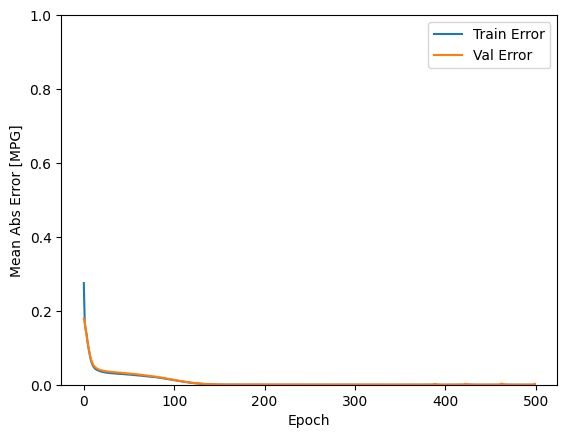

In [12]:
# Se serializa el modelo en formato JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

# Se serializan los pesos a formato HDF5
model.save_weights("model.h5")
print("Modelo Guardado!")

#Imprimo la curva de aprendizaje del modelo
plot_history(history)

A partir de este punto está el código de implementación de la red

In [13]:
# Alimento el modelo ya entrenado con las entradas 
prueba = pd.read_csv("D:\\Programas\\OneDrive - Estudiantes ITCR\\TEC\\Semestre 9\\IA\\Tareas\\Tarea1_IA\\ParteA\\Prueba.csv", sep=';')
prueba = mean_norm(prueba)
model.predict(prueba)

1/1 [==============================] - 0s 148ms/step


array([[0.07894843],
       [0.4999792 ],
       [0.9161609 ]], dtype=float32)